# Time Law of Large Numbers and Central limit 

##### Keywords: LLN, Central Limit, scipy stats, timing your code


In [33]:
import numpy as np
import matplotlib.pyplot as plt
# need to import time to time your code
import time

time.time()

Return Value
    This method returns the time as a floating point number expressed in seconds since the epoch, in UTC. (https://www.epochconverter.com/)

Example
    The following example shows the usage of time() method.

In [34]:
import time

## time in seconds
print("time.time(): %f " %  time.time())
print(time.localtime( time.time() ) )
print(time.asctime( time.localtime(time.time()) ) )

time.time(): 1519324208.983996 
time.struct_time(tm_year=2018, tm_mon=2, tm_mday=22, tm_hour=13, tm_min=30, tm_sec=8, tm_wday=3, tm_yday=53, tm_isdst=0)
Thu Feb 22 13:30:08 2018


### we can time our code using time.time()
### eg: dot product between vectors
1. at the beginning of the piece of code: assign t1 = time.time() , this the time when your code starts,
1. at the end of the piece of code: assign t2 = time.time() , this the time when your code ends,
1.  (t2 - t1)  is the amount of time (in secs) it takes your code to run

In [35]:
N = int(1e5)
v1 = np.arange(N)
v2 = np.random.rand(N)

## when two vectors are of the same length, you can take dot product
######################################################
print(len(v1) == len(v2))

True


In [36]:
## dot product using for loop 
######################################################

t1_for = time.time() 
sum_for = 0
for i in range(N):
    sum_for += v1[i]*v2[i]
t2_for = time.time()

sum_for = np.round(sum_for,3)
time_for= t2_for - t1_for

print('v1 dot v2 use for loop:', sum_for)
print('time spent:', time_for)

## dot product using numpy built-in dot
######################################################

t1_np  = time.time() 
sum_np = 0
sum_np = np.round(v1.dot(v2),3)
t2_np  = time.time() 
time_np= t2_np - t1_np

print('\nv1 dot v2 use np.dot():', sum_np)
print('time spent:', time_np)

## same answer, but timewise?
######################################################
print('\nsame answer?',sum_np == sum_for )

v1 dot v2 use for loop: 2503659432.86
time spent: 0.3175642490386963

v1 dot v2 use np.dot(): 2503659432.86
time spent: 0.00038623809814453125

same answer? True


In [37]:
## use np.random.randint(a,b,n) -- randomly generated n integers  [a,b)
## each number has the same chance to be drown
#########################################################################
print('10 random integers between [0,2):',np.random.randint(0,2,10) )
print('10 random integers between [1,5):',np.random.randint(1,5,10) ) # 5 is not included

10 random integers between [0,2): [1 0 0 0 0 1 1 1 0 0]
10 random integers between [1,5): [1 1 4 4 2 1 1 3 4 2]


# Central Limit
## We first want to show flip a fair coin n times, each time corresponds to a random variable $X_i$ follws Bernoulli(1/2). 
## $\mathbb{E}(X_i) = 1/2$ and Var($X_i$) = 1/4

## Let $A_n = \frac{S_n}{n}$, where $S_n = \sum_{i=1}^{n} X_i$
## As $n\rightarrow \infty$, Central limit Theorem asserts that 
## $$A_n\rightarrow \mathbb{E}(X_i)=1/2$$

In [38]:
## function: to throw the coin randomly n times
## each time i flip, I compute (Sk + new result)/(k+1)
## I want n goes to large, say 10000
##################################################

t1 = time.time()
i  = 0
n  = int(1e5)
Si = 0
flip_mean = np.zeros(n)
while(i<n):
    Xi = np.random.randint(0,2)
    Si = Si + Xi
    Ai = Si/(i+1)
    flip_mean[i] = Ai
    i += 1
t2 = time.time()


print(t2-t1)


0.2639579772949219


In [39]:
## Method two: generate n  = int(1e5) many samples all together
## and compute the average from 0th to the kth
##################################################

n  = int(1e5)
t1 = time.time()
flips = np.random.randint(0,2,n)
t2 = time.time()
flip_mean = np.array([np.sum(flips[:i])/(i+1) for i in range(n)])
t3 = time.time()

# here you found out most of time was spent on 
# calculating slip_mean
print(t2-t1)
print(t3-t2)


0.0009918212890625
2.9924871921539307


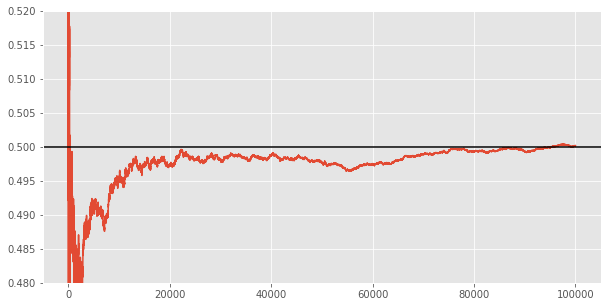

In [41]:
plt.figure(figsize=(10,5))
plt.plot(flip_mean);
plt.axhline(0.5, c='black')
plt.ylim([0.480,0.520])
plt.style.use('ggplot')
plt.show()

# Samples from a population of coin flips

## More coin flips; 

1. Do a large set of replications
1. We will do a large set of experiments M
1. In each of which we will do many coin flips N.  -- a sample
1. The number of samples is M, and the sample size is N.


## Samples from a population of coin flips

Lets do some more coin flips; this time we'll do them in many replications. We'll establish some terminology at first. 

We will do a large set of replications M, in each of which we will do many coin flips N. We'll call the result of each coin flip an observation, and a single replication a sample of observations. Thus the number of samples is M, and the sample size is N. These samples have been chosen from a population of size $n >> N$.





# Law of Large Number and Central Limit

In [42]:
## function: to throw the coin randomly n times
##################################################
def throw_a_coin(n):
    result = np.random.randint(0,2,n)
    ## each element inside the result corresponds to a 
    ## random variable X_i~Bernoulli(1/2)
    return result


sample_size = 10
X  = throw_a_coin(sample_size)
Sn = X.sum()
An = Sn/sample_size
print('flip = ',X)
print(An)

flip =  [0 0 1 0 0 1 1 1 0 1]
0.5


In [43]:
## function: generate sample_size many samples, each of size
## number_of_samples
##################################################

def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

## this gives me 5 samples, each of the sample corresponds to 10 tosses
make_throws(5,10)

array([ 0.4,  0.4,  0.7,  0.7,  0.8])

# We show the mean over the observations, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [44]:
make_throws(number_of_samples=20, sample_size=10)

array([ 0.5,  0.5,  0.6,  0.9,  0.3,  0.4,  0.8,  0.4,  0.7,  0.3,  0.6,
        0.4,  0.8,  0.4,  0.5,  0.7,  0.5,  0.5,  0.4,  0.5])

##### Lets formalize what we are up to. Lets call the N (20 as the above) random variables in the $m^{th}$  (say 2nd) sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean

## $$\bar{x}_m(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$

## Now imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population

## Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the law of large numbers.

## Of course, if you drew many different samples of a size N (which is not infinite), the sample means $\bar{x_1}$, $\bar{x_2}$, etc would all be a bit different from each other. But the law of large numbers intuitively indicates that as the sample size gets very large and becomes an infinite population size, these slightly differeing means would all come together and converge to the population (or distribution) mean.

## To see this, we define the mean or expectation of the sample means over the set of samples or replications, at a sample size N:

# $$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x}_m(N) ,$$
# where $\{R\}$ is the set of M replications, and calculate and plot this quantity.

In [45]:
## This case we have M = 10 samples, each sample of N = 20 throws
## make_throws = gives the vector of x¯m(N)
## make_throws.mean() is E{R}(x¯)
make_throws(number_of_samples=20, sample_size=10) 

array([ 0.6,  0.7,  0.7,  0.2,  0.4,  0.4,  0.6,  0.4,  0.5,  0.5,  0.5,
        0.4,  0.4,  0.5,  0.6,  0.5,  0.3,  0.5,  0.2,  0.4])

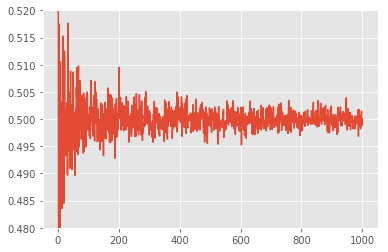

In [46]:

## Now I want to fix number of samples as 200
## for as sample_size increases (1,2,3...,1000)
## I want to make throughs
sample_sizes         =  np.arange(1,1001,1)
sample_means         = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]
mean_of_sample_means = [np.mean(means) for means in sample_means]

plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);
plt.show()

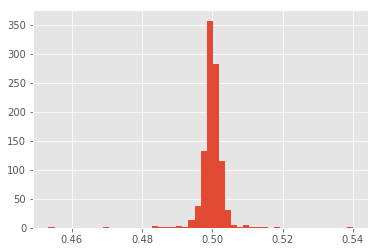

In [47]:
plt.hist(mean_of_sample_means,bins = 50)
plt.show()

## The notion of a Sampling Distribution

## In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

## But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**. 



## We can see this mathematically by writing the mean or expectation value of the sample means thus:

## $$E_{\{R\}}(N\,\bar{x}) = $$
## $$ E_{\{R\}}(\bar{x}_1 + ... + \bar{x}_N) = E_{\{R\}}(\bar{x}_1) + E_{\{R\}}(\bar{x}_2) + ... + E_{\{R\}}(\bar{x}_N)$$

## Now in the limit of a very large number of replications, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:

$$\begin{eqnarray}
E_{\{R\}}(N\,\bar{x}) &=& N\, \mu\\
E_{\{R\}}(\bar{x}) &=& \mu
\end{eqnarray}$$

# which tells us that in the limit of a large number of replications the expectation value of the sampling means converges to the population mean. This limit gives us the true sampling distribution, as opposed to what we might estimate from our finite set of replicates. (Thus there our $E_{\{R\}}$ would be replaced by  some $E_{fs}$ where by $fs$ we wish to indicate the pmf or density of the sampling distribution).


### The sampling distribution as a function of sample size

We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

In [48]:
# take the sample with 10 flips, 100 flips, and 1000 flips
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]


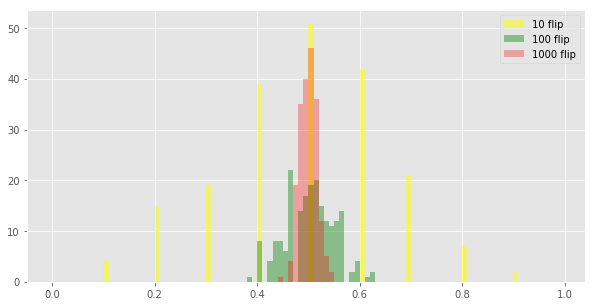

In [49]:
plt.figure(figsize = (10,5))
plt.hist(sample_means_at_size_10, color = 'yellow',
         bins=np.arange(0,1,0.01), label = '10 flip',
         alpha=0.5);
plt.hist(sample_means_at_size_100, color = 'green',
         bins=np.arange(0,1,0.01), label = '100 flip',
         alpha=0.4);
plt.hist(sample_means_at_size_1000, color = 'red',
         bins=np.arange(0,1,0.01), label = '1000 flip',
         alpha=0.3);
plt.style.use('ggplot')
plt.legend()
plt.show()

## The distribution is much tighter at large sample sizes, and that you can have way low and way large means at small sample sizes. Indeed there are means as small as 0.1 at a sample size of 10, and as small as 0.3 at a sample size of 100. 

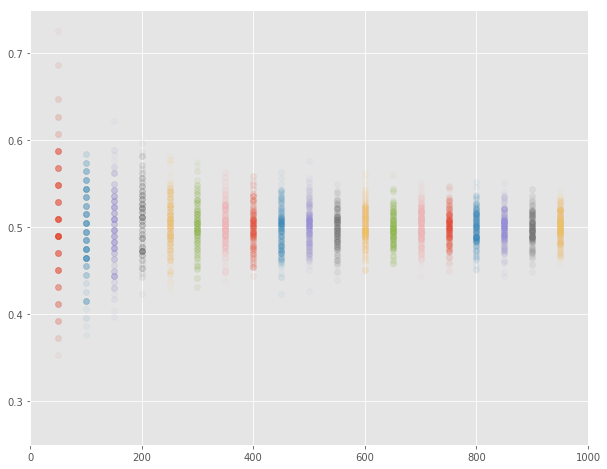

In [55]:
# Lets plot the distribution of the mean as a function of sample size.

plt.figure(figsize=(10,8))
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.05);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);
plt.show()

## The variation of the sample mean

### Let the underlying distribution from which we have drawn our samples have, additionally to a well defined mean $\mu$, a well defined variance $\sigma^2$. 

### Then, as before:

### $$V_{\{R\}}(N\,\bar{x}) = V_{\{R\}}(\bar{x}_1 + \bar{x}_2 + ... + \bar{x}_N) = V_{\{R\}}(\bar{x}_1) + V_{\{R\}}(\bar{x}_2) + ... + V_{\{R\}}(\bar{x}_N)$$

### Now in the limit of a very large number of replications, each of the variances in the right hand side can be replaced by the population variance using the law of large numbers! Thus:

### $$\begin{eqnarray}
V_{\{R\}}(N\,\bar{x}) &=& N\, \sigma^2\\
V(\bar{x}) &=& \frac{\sigma^2}{N}
\end{eqnarray}$$

### This simple formula explains the tell-tale triangular plot we saw above, with lots of variation at low sample sizes turning into a tight distribution at large sample size(N).

### The standard deviation of the sampling distribution of the mean (in other words, the distribution of sample means) is also called the **Standard Error**.

### We can obtain the standard deviation of the sampling distribution of the mean at different sample sizes and plot it against the sample size, to confirm the $1/\sqrt{N}$ behaviour. 

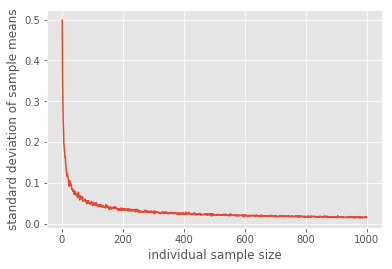

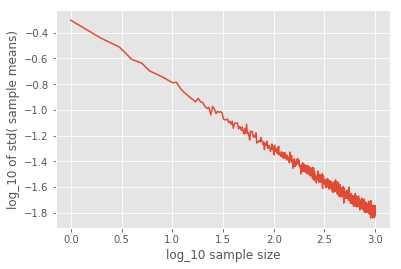

In [56]:
std_of_sample_means = [np.std(means) for means in sample_means]
plt.plot((sample_sizes), (std_of_sample_means));
plt.xlabel('individual sample size')
plt.ylabel('standard deviation of sample means')
plt.show()

plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means));
plt.xlabel('log_10 sample size')
plt.ylabel('log_10 of std( sample means)')

plt.show()



## Let us plot again the distribution of sample means at a large sample size, N=1000. What distribution is this?

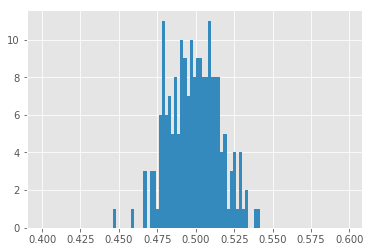

In [58]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));
plt.show()

### The Gaussian Distribution

### We saw in class that the sampling distribution of the mean itself has a mean $\mu$ and variance $\frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

### The probability density of the normal distribution $N(\mu, \sigma^2)$ is given as:

$$  \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} } .$$

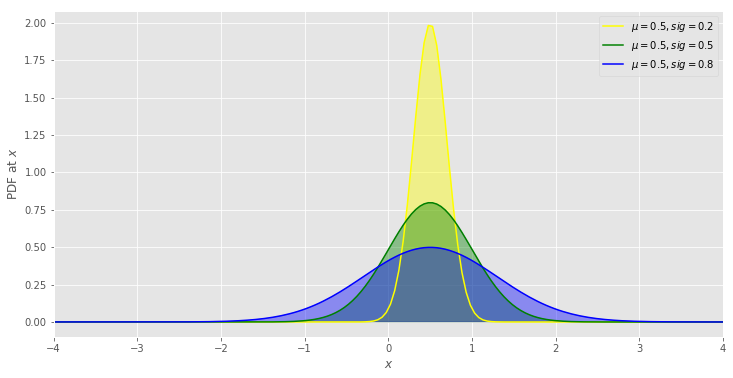

In [59]:
import scipy as sp
import scipy.stats
##  You must import scipy.stats to use functions inside 
##  scipy.stats
norm =  sp.stats.norm
x = np.linspace(-5,5, 200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], ['yellow','green','blue']):
    plt.plot(x, norm.pdf(x, mu, sigma),
             c=c, label = r"$\mu = {0:.1f}, sig={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-4,4])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$");
plt.show()

## The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$A_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

# $$ A_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$


# This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

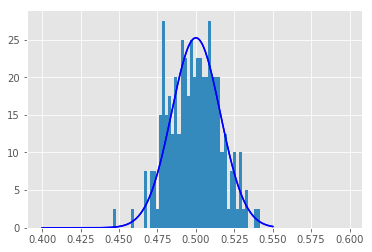

In [61]:
# combined with coin tosses
# for sample_means_at_size_1000
mu   = 0.5
sigma= np.sqrt(0.5*0.5/1000)
x    = np.linspace(0.4,0.55, 200)

plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002), normed = 1);
plt.plot(x, norm.pdf(x, mu, sigma),
             c=c, label = r"$\mu = {0:.1f}, sig={1:.1f}$".format(mu, sigma))
plt.show()